In [5]:
import numpy as np

In [1]:
from trsm import TRSM, combos

In [11]:
import vector

In [3]:
filename = f'../../signal/skimmed/NMSSM_XYH_YToHH_6b_MX_700_MY_400_testing_set_skimmed.root'
trsm = TRSM(filename=filename)

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Opening ROOT file ../../signal/skimmed/NMSSM_XYH_YToHH_6b_MX_700_MY_400_testing_set_skimmed.root with columns
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Tree contains 52891 events.
----------------------------------------------------------------------------------------------------
                                            TABLE COLUMNS                                           
----------------------------------------------------------------------------------------------------
jet_pt                            jet_eta                           jet_phi                           
jet_m                             jet_btag                          jet_qgl                           
jet_idx                           jet_hadronFlav                    jet_partonFlav                    
HX_b1_recojet_m                   HX_b1_recojet_pt                  HX_b1_recojet_eta   

In [8]:
combos7 = combos(trsm, 7)

100%|██████████| 52891/52891 [00:27<00:00, 1956.77it/s]


Total events chosen: 8052


In [9]:
pt_7  = combos7.combo_features[:,0:6]
eta_7 = combos7.combo_features[:,6:12]
phi_7 = combos7.combo_features[:,12:18]
m_7   = np.ones(pt_7.shape)*4

In [12]:
p4_7_0 = vector.obj(pt=pt_7[:,0], eta=eta_7[:,0], phi=phi_7[:,0], mass=m_7[:,0])
p4_7_1 = vector.obj(pt=pt_7[:,1], eta=eta_7[:,1], phi=phi_7[:,1], mass=m_7[:,1])
p4_7_2 = vector.obj(pt=pt_7[:,2], eta=eta_7[:,2], phi=phi_7[:,2], mass=m_7[:,2])
p4_7_3 = vector.obj(pt=pt_7[:,3], eta=eta_7[:,3], phi=phi_7[:,3], mass=m_7[:,3])
p4_7_4 = vector.obj(pt=pt_7[:,4], eta=eta_7[:,4], phi=phi_7[:,4], mass=m_7[:,4])
p4_7_5 = vector.obj(pt=pt_7[:,5], eta=eta_7[:,5], phi=phi_7[:,5], mass=m_7[:,5])

In [13]:
p4_7 = p4_7_0 + p4_7_1 + p4_7_2 + p4_7_3 + p4_7_4 + p4_7_5

In [ ]:
p4_7 = combos7.sixjet_p4

In [16]:
sgnl_mass_7 = p4_7.mass[combos7.sgnl_mask]
bkgd_mass_7 = p4_7.mass[~combos7.sgnl_mask]

In [17]:
from lmfit.models import GaussianModel

bins = np.linspace(300,1100,150)
n_s, b_s = np.histogram(sgnl_mass_7, bins=bins)

x = (b_s[1:] + b_s[:-1]) / 2
y = n_s

mod = GaussianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 149
    # variables        = 3
    chi-square         = 8532.91680
    reduced chi-square = 58.4446356
    Akaike info crit   = 609.113293
    Bayesian info crit = 618.125132
[[Variables]]
    amplitude:  41839.0911 +/- 316.460737 (0.76%) (init = 58993.29)
    center:     626.515009 +/- 0.52420552 (0.08%) (init = 627.5168)
    sigma:      60.0197458 +/- 0.52420553 (0.87%) (init = 67.11409)
    fwhm:       141.335698 +/- 1.23440966 (0.87%) == '2.3548200*sigma'
    height:     278.098199 +/- 2.10346887 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.577


In [18]:
out.best_values

{'amplitude': 41839.0911080425,
 'center': 626.5150092135499,
 'sigma': 60.01974581553952}

In [19]:
A = out.best_values['amplitude']
c = out.best_values['center']
s = out.best_values['sigma']

In [20]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [21]:
min_mass = c - 2*s
max_mass = c + 2*s

In [22]:
sgnl_mass_mask = np.logical_or(sgnl_mass_7 > min_mass, sgnl_mass_7 < max_mass)
bkgd_mass_mask = np.logical_or(bkgd_mass_7 > min_mass, bkgd_mass_7 < max_mass)

In [24]:
import matplotlib.pyplot as plt

In [26]:
from consistent_plots import hist

Text(0, 0.5, 'AU')

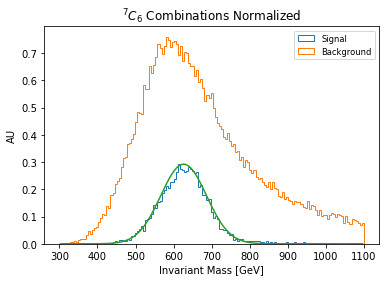

In [27]:
fig, ax = plt.subplots()
ax.set_title(r"$^7C_6$ Combinations Normalized")

bins = np.linspace(300,1100,150)

n_s, b_s = np.histogram(sgnl_mass_7, bins=bins)
n_b, b_b = np.histogram(bkgd_mass_7, bins=bins)
n, b = np.histogram(p4_7.mass, bins=bins)

x = (b_s[1:] + b_s[:-1])/2

gaus = gaussian(x, c, s)
_ = hist(ax, x, weights=n_s/n.max(), bins=bins, label='Signal')
_ = hist(ax, x, weights=n_b/n.max(), bins=bins, label='Background')
_ = ax.plot(x, n_s.max()*gaus/n.max())

# _ = hist(ax, x, weights=n/n.max(), label='All')
ax.legend(loc=1, fontsize='small')
ax.set_xlabel(r'Invariant Mass [GeV]')
ax.set_ylabel('AU')

In [28]:
len(sgnl_mass_mask) / (len(sgnl_mass_mask) + len(bkgd_mass_mask))

0.14285714285714285